/tmp/ipykernel_9482/1358247474.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


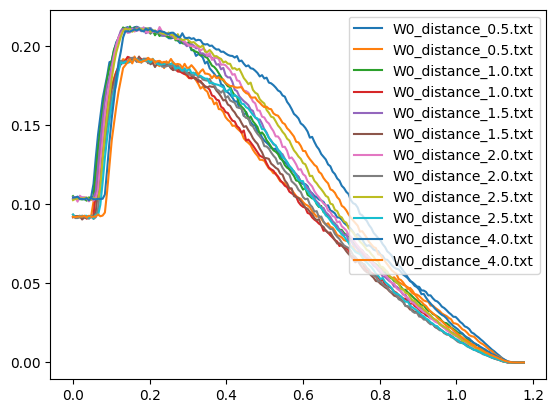

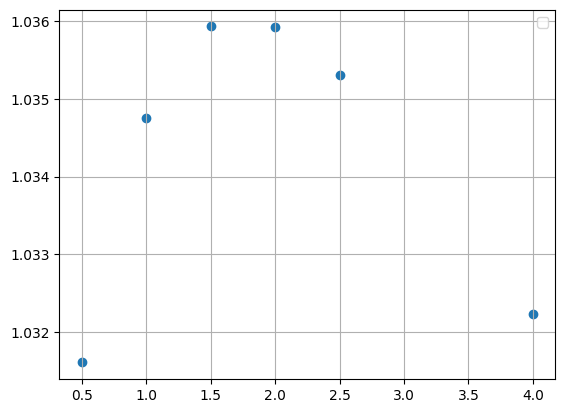

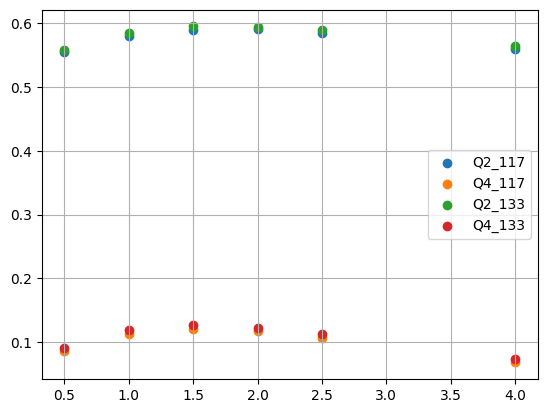

In [61]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

# Replace with your actual file path
filename = ['W0_distance_0.5.txt',
            'W0_distance_1.0.txt',
            'W0_distance_1.5.txt',
            'W0_distance_2.0.txt',
            'W0_distance_2.5.txt',
            'W0_distance_4.0.txt',]

W0 = []
q2117 = []
q4117 = []
q2133 = []
q4133 = []
#
def P2(x):
    return 0.5 * (3*x**2 - 1)

def P4(x):
    return (35*x**4 - 30*x**2 + 3) / 8
# Load data, skipping the first 3 lines
for i in range(len(filename)):
    data = np.loadtxt(filename[i], skiprows=4)
    J0_117 = 0
    J2_117 = 0
    J4_117 = 0
    Q2_117 = 0
    Q4_117 = 0
    J0_133 = 0
    J2_133 = 0
    J4_133 = 0
    Q2_133 = 0
    Q4_133 = 0
    # Extract desired columns
    beta_index = np.linspace(0,1.17601,199)

    eff_117 = data[:, 1]
    eff_133 = data[:, 3]
    plt.plot(beta_index,eff_117,label=filename[i])
    plt.plot(beta_index,eff_133,label=filename[i])

    plt.legend()
    plt.grid()
    weights = np.ones_like(beta_index) * d_beta
    weights[0] = d_beta/2  # first point
    weights[-1] = d_beta/2  # last point
   
    # Corrected Legendre polynomials

# Integration loop (with proper d_beta handling)
    # INSIDE YOUR FILENAME LOOP:
    for j in range(len(beta_index)):
        beta = beta_index[j]
        costheta = np.cos(beta)
        sintheta = np.sin(beta)
        w = weights[j]  # trapezoidal weight

        # For 1.17 MeV
        eff117 = eff_117[j]
        J0_117 += sintheta * 1 * eff117 * w
        J2_117 += sintheta * P2(costheta) * eff117 * w
        J4_117 += sintheta * P4(costheta) * eff117 * w

        # For 1.33 MeV
        eff133 = eff_133[j]
        J0_133 += sintheta * 1 * eff133 * w
        J2_133 += sintheta * P2(costheta) * eff133 * w
        J4_133 += sintheta * P4(costheta) * eff133 * w
    
    Q2_117 = J2_117 / J0_117
    Q4_117 = J4_117 / J0_117
    Q2_133 = J2_133 / J0_133
    Q4_133 = J4_133 / J0_133
    q2117.append(Q2_117)
    q2133.append(Q2_133)
    q4117.append(Q4_117)
    q4133.append(Q4_133)
    W0.append(1+0.102*Q2_117*Q2_133+0.0091*Q4_117*Q4_133)
DISTANCES = [0.5,1.0,1.5,2.0,2.5,4.0]
plt.figure()
plt.scatter(DISTANCES,W0)
plt.legend()
plt.grid()
plt.figure()
plt.scatter(DISTANCES,q2117,label="Q2_117")
plt.scatter(DISTANCES,q4117,label="Q4_117")
plt.scatter(DISTANCES,q2133,label="Q2_133")
plt.scatter(DISTANCES,q4133,label="Q4_133")

plt.legend()
plt.grid()

In [56]:
np.rad2deg(np.arcsin(1))

90.0

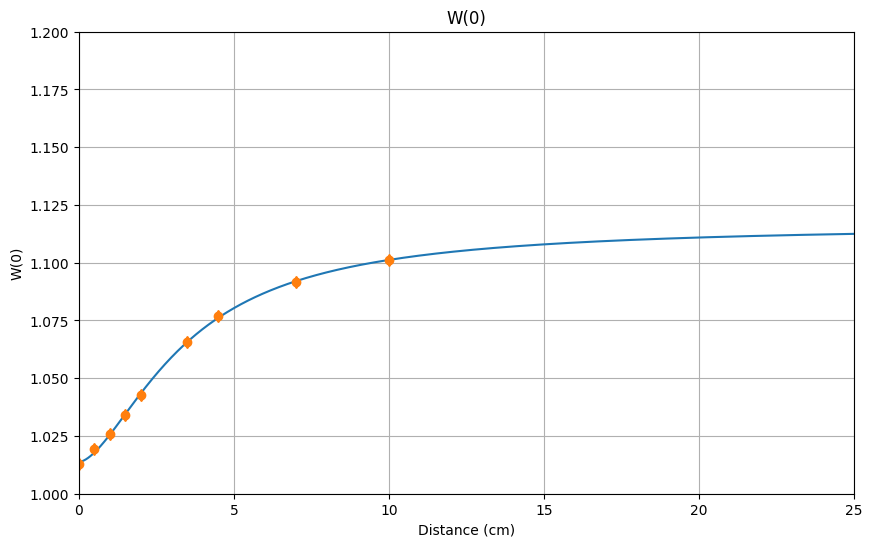

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def P2(x):
    return 0.5 * (3*x**2 - 1)

def P4(x):
    return (35*x**4 - 30*x**2 + 3)/8.0
def fit_error_band(x, popt, pcov):

    J = np.zeros((len(x), len(popt)))
    eps = np.sqrt(np.finfo(float).eps)
    for i in range(len(popt)):
        dp = np.zeros_like(popt)
        dp[i] = eps * popt[i] if popt[i] != 0 else eps
        J[:, i] = (eff_model(x, *(popt + dp)) - eff_model(x, *(popt - dp))) / (2 * dp[i])

    var = np.einsum('ij,jk,ik->i', J, pcov, J)
    return np.sqrt(var)  

radius_mm = 24.0
filenames = [
    'W0_distance_0.5.txt',
    'W0_distance_1.0.txt',
    'W0_distance_1.5.txt',
    'W0_distance_2.0.txt',
    'W0_distance_2.5.txt',
    'W0_distance_4.0.txt',
    'W0_distance_5.0.txt',
    'W0_distance_7.5.txt',
    'W0_distance_10.5.txt',
]
distances_cm = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 4.0,5.0,7.5,10.5])
W0_results = []
W0_err_result = []
for dist_cm, fname in zip(distances_cm, filenames):
    data = np.loadtxt(fname, skiprows=4)
    beta_rad = data[:, 0]
    eff_117 = data[:, 1]
    err_eff_117 = data[:, 2]
    eff_133 = data[:, 3]
    err_eff_133 = data[:, 4]

    dist_mm = dist_cm * 10
    actual_beta_max = np.arctan(radius_mm / dist_mm)
    
    mask = beta_rad <= actual_beta_max
    beta_rad = beta_rad[mask]
    eff_117 = eff_117[mask]
    err_eff_117=err_eff_117[mask]
    eff_133 = eff_133[mask]
    err_eff_133=err_eff_133[mask]
    #print("Actual beta max",actual_beta_max)
    d_beta = beta_rad[1] - beta_rad[0]
    weights = np.full_like(beta_rad, d_beta)
    weights[0] = d_beta / 2
    weights[-1] = d_beta / 2
    
    # Initialize integrals
    J0_117, J2_117, J4_117 = 0, 0, 0
    J0_133, J2_133, J4_133 = 0, 0, 0
    variance_J0_117 , variance_J2_117, variance_J4_117 = 0,0,0
    variance_J0_133 , variance_J2_133, variance_J4_133 = 0,0,0

    for i, beta in enumerate(beta_rad):
        c = np.cos(beta)
        s = np.sin(beta)
        w = weights[i]
        
        J0_117 += s * 1 * eff_117[i] * w
        J2_117 += s * P2(c) * eff_117[i] * w
        J4_117 += s * P4(c) * eff_117[i] * w
        variance_J0_117+= (s * 1 * err_eff_117[i] * w)**2
        variance_J2_117+= (s * P2(c) * err_eff_117[i] * w)**2
        variance_J4_117+= (s * P4(c) * err_eff_117[i] * w)**2

        J0_133 += s * 1 * eff_133[i] * w
        J2_133 += s * P2(c) * eff_133[i] * w
        J4_133 += s * P4(c) * eff_133[i] * w
        variance_J0_133+= (s * 1 * err_eff_133[i] * w)**2
        variance_J2_133+= (s * P2(c) * err_eff_133[i] * w)**2
        variance_J4_133+= (s * P4(c) * err_eff_133[i] * w)**2

    Q2_117 = J2_117 / J0_117
    Q2_117_err = np.sqrt(variance_J2_117 / (J0_117**2) +(J2_117*J2_117*variance_J0_117)/(J0_117**4))
    Q4_117 = J4_117 / J0_117
    Q4_117_err = np.sqrt(variance_J4_117 / (J0_117**2) +(J4_117*J4_117*variance_J0_117)/(J0_117**4))

    Q2_133 = J2_133 / J0_133
    Q2_133_err = np.sqrt(variance_J2_133 / (J0_133**2) +(J2_133*J2_133*variance_J0_133)/(J0_133**4))

    Q4_133 = J4_133 / J0_133
    Q4_133_err = np.sqrt(variance_J4_133 / (J0_133**2) +(J4_133*J4_133*variance_J0_133)/(J0_133**4))

    # Calculate W(0)
    W0 = 1 + 0.102 * Q2_117 * Q2_133 + 0.0091 * Q4_117 * Q4_133

    err2 = 0.102 * Q2_117 * Q2_133 *np.sqrt((Q2_117*Q2_133_err)**2 +(Q2_133*Q2_117_err)**2)
    err4 = 0.0091 * Q4_117 * Q4_133*np.sqrt((Q4_117*Q4_133_err)**2 +(Q4_133*Q4_117_err)**2)

    W0_err = np.sqrt(err2**2 + err4**2)
    W0_results.append(W0)
    W0_err_result.append(W0_err)
    #print(f"Distance {dist_cm}cm: W0 = {W0:.4f}")

# Plot results
def theory(x,a1,a2,p,d0):
    return a2+(a1-a2)/(1+(x/d0)**p)

popt,pcov = curve_fit(theory,distances_cm-0.5,W0_results,p0=[1.006,1.112,1.662,2.341],sigma=W0_err)
err_band = fit_error_band(distances_cm-0.5, popt, pcov)


x=np.linspace(0,25,1000)
plt.figure(figsize=(10, 6))
plt.plot(x,theory(x,*popt),label="Illesztés")
plt.errorbar(distances_cm-0.5, W0_results,yerr=W0_err,fmt='o', uplims=True, lolims=True,label="Szimuláció")
plt.xlabel('Distance (cm)')
plt.ylabel('W(0)')
plt.title('W(0)')
plt.ylim(1.0,1.2)
plt.xlim(0,25)
plt.grid(True,which='both',clip_on=True)
print("W(0) a detektorról ~ 0.52cm = ",theory(1.02,*popt))
print("W(0) a detektortól ~ 3.267cm = ",theory(3.767,*popt))
print("W(0) a detektortól ~ 5.0cm = ",theory(5.5,*popt))
plt.show()

W(0) a detektorról ~ 0.52cm =  1.0259187134070626
W(0) a detektortól ~ 3.267cm =  1.0688494908057877
W(0) a detektortól ~ 5.0cm =  1.0839145738154294
